<a href="https://colab.research.google.com/github/NimsW20/YOLOv10-Based-Automatic-License-Plate-Detection/blob/main/Traning_Model_Yolo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Aug 14 17:37:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setup and installs

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#install Yolov10
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 10.1 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


### Inference with pretrained Coco model



/content


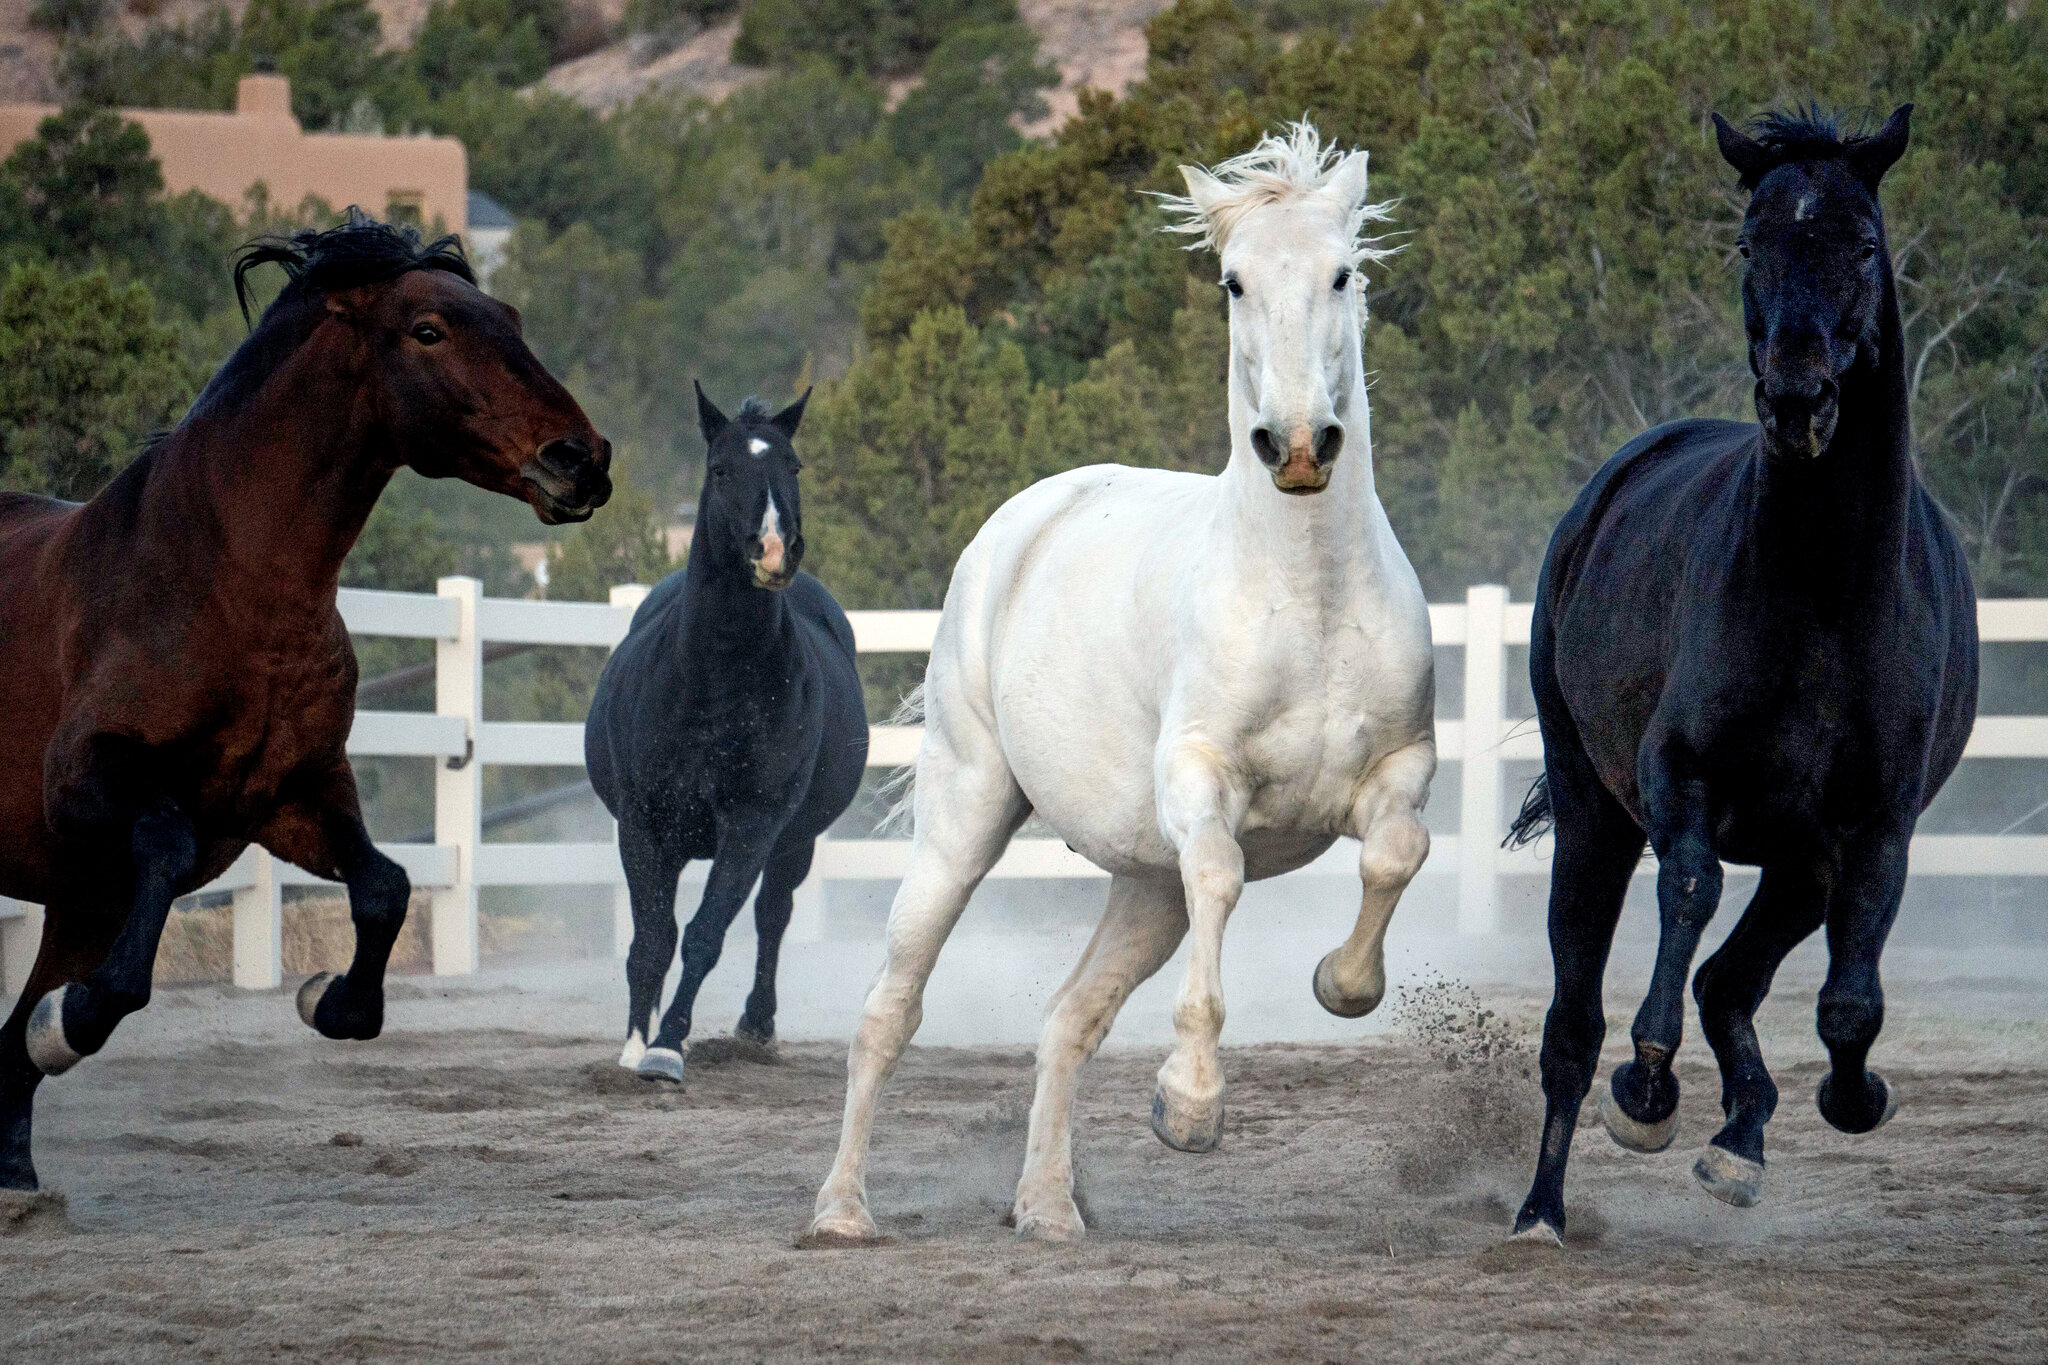

In [6]:
from IPython.display import Image

%cd {HOME}

Image(filename='/content/1.jpg', height=600)

In [7]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model={HOME}/weights/yolov10s.pt source=/content/1.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8096880 parameters, 86880 gradients, 24.8 GFLOPs

image 1/1 /content/1.jpg: 448x640 4 17s, 157.2ms
Speed: 17.0ms preprocess, 157.2ms inference, 444.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [8]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'/content/1.jpg', conf=0.25)


image 1/1 /content/1.jpg: 448x640 4 17s, 70.5ms
Speed: 3.4ms preprocess, 70.5ms inference, 158.5ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
print(results[0].boxes.xyxy)
print(results[0].boxes.conf)
print(results[0].boxes.cls)

tensor([[8.5293e-01, 2.2763e+02, 6.1452e+02, 1.1875e+03],
        [1.5064e+03, 9.6826e+01, 1.9783e+03, 1.2307e+03],
        [5.8001e+02, 3.6559e+02, 8.6865e+02, 1.0882e+03],
        [8.0547e+02, 1.1447e+02, 1.4385e+03, 1.2499e+03]], device='cuda:0')
tensor([0.9174, 0.8983, 0.8747, 0.8440], device='cuda:0')
tensor([17., 17., 17., 17.], device='cuda:0')



0: 448x640 4 17s, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


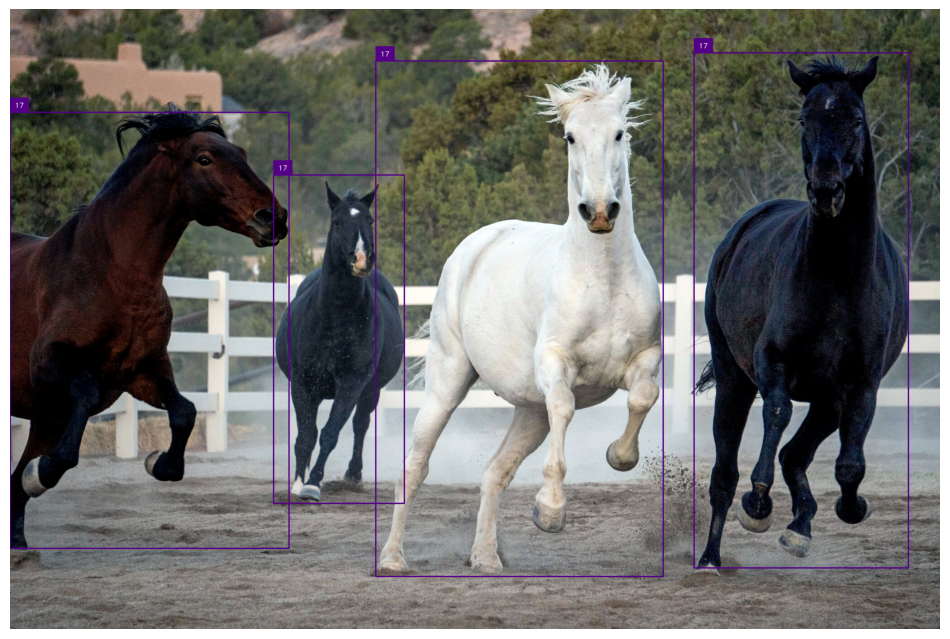

In [10]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'/content/1.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

### Custom Training

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd /content/drive/MyDrive/Yolo10/custom_dataset/dataset

/content/drive/MyDrive/Yolo10/custom_dataset/dataset


In [22]:
%cd /content/drive/MyDrive/Yolo10

!yolo task=detect mode=train model=yolov10n.pt epochs=25 batch=8 plots=True data=data.yaml
      #use nano version because of less data

/content/drive/MyDrive/Yolo10
New https://pypi.org/project/ultralytics/8.2.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

In [23]:
!ls runs/detect/train/

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1723659047.62389a59312d.10103.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch405.jpg  weights
P_curve.png					     train_batch406.jpg
PR_curve.png					     train_batch407.jpg


### Confusion Matrix

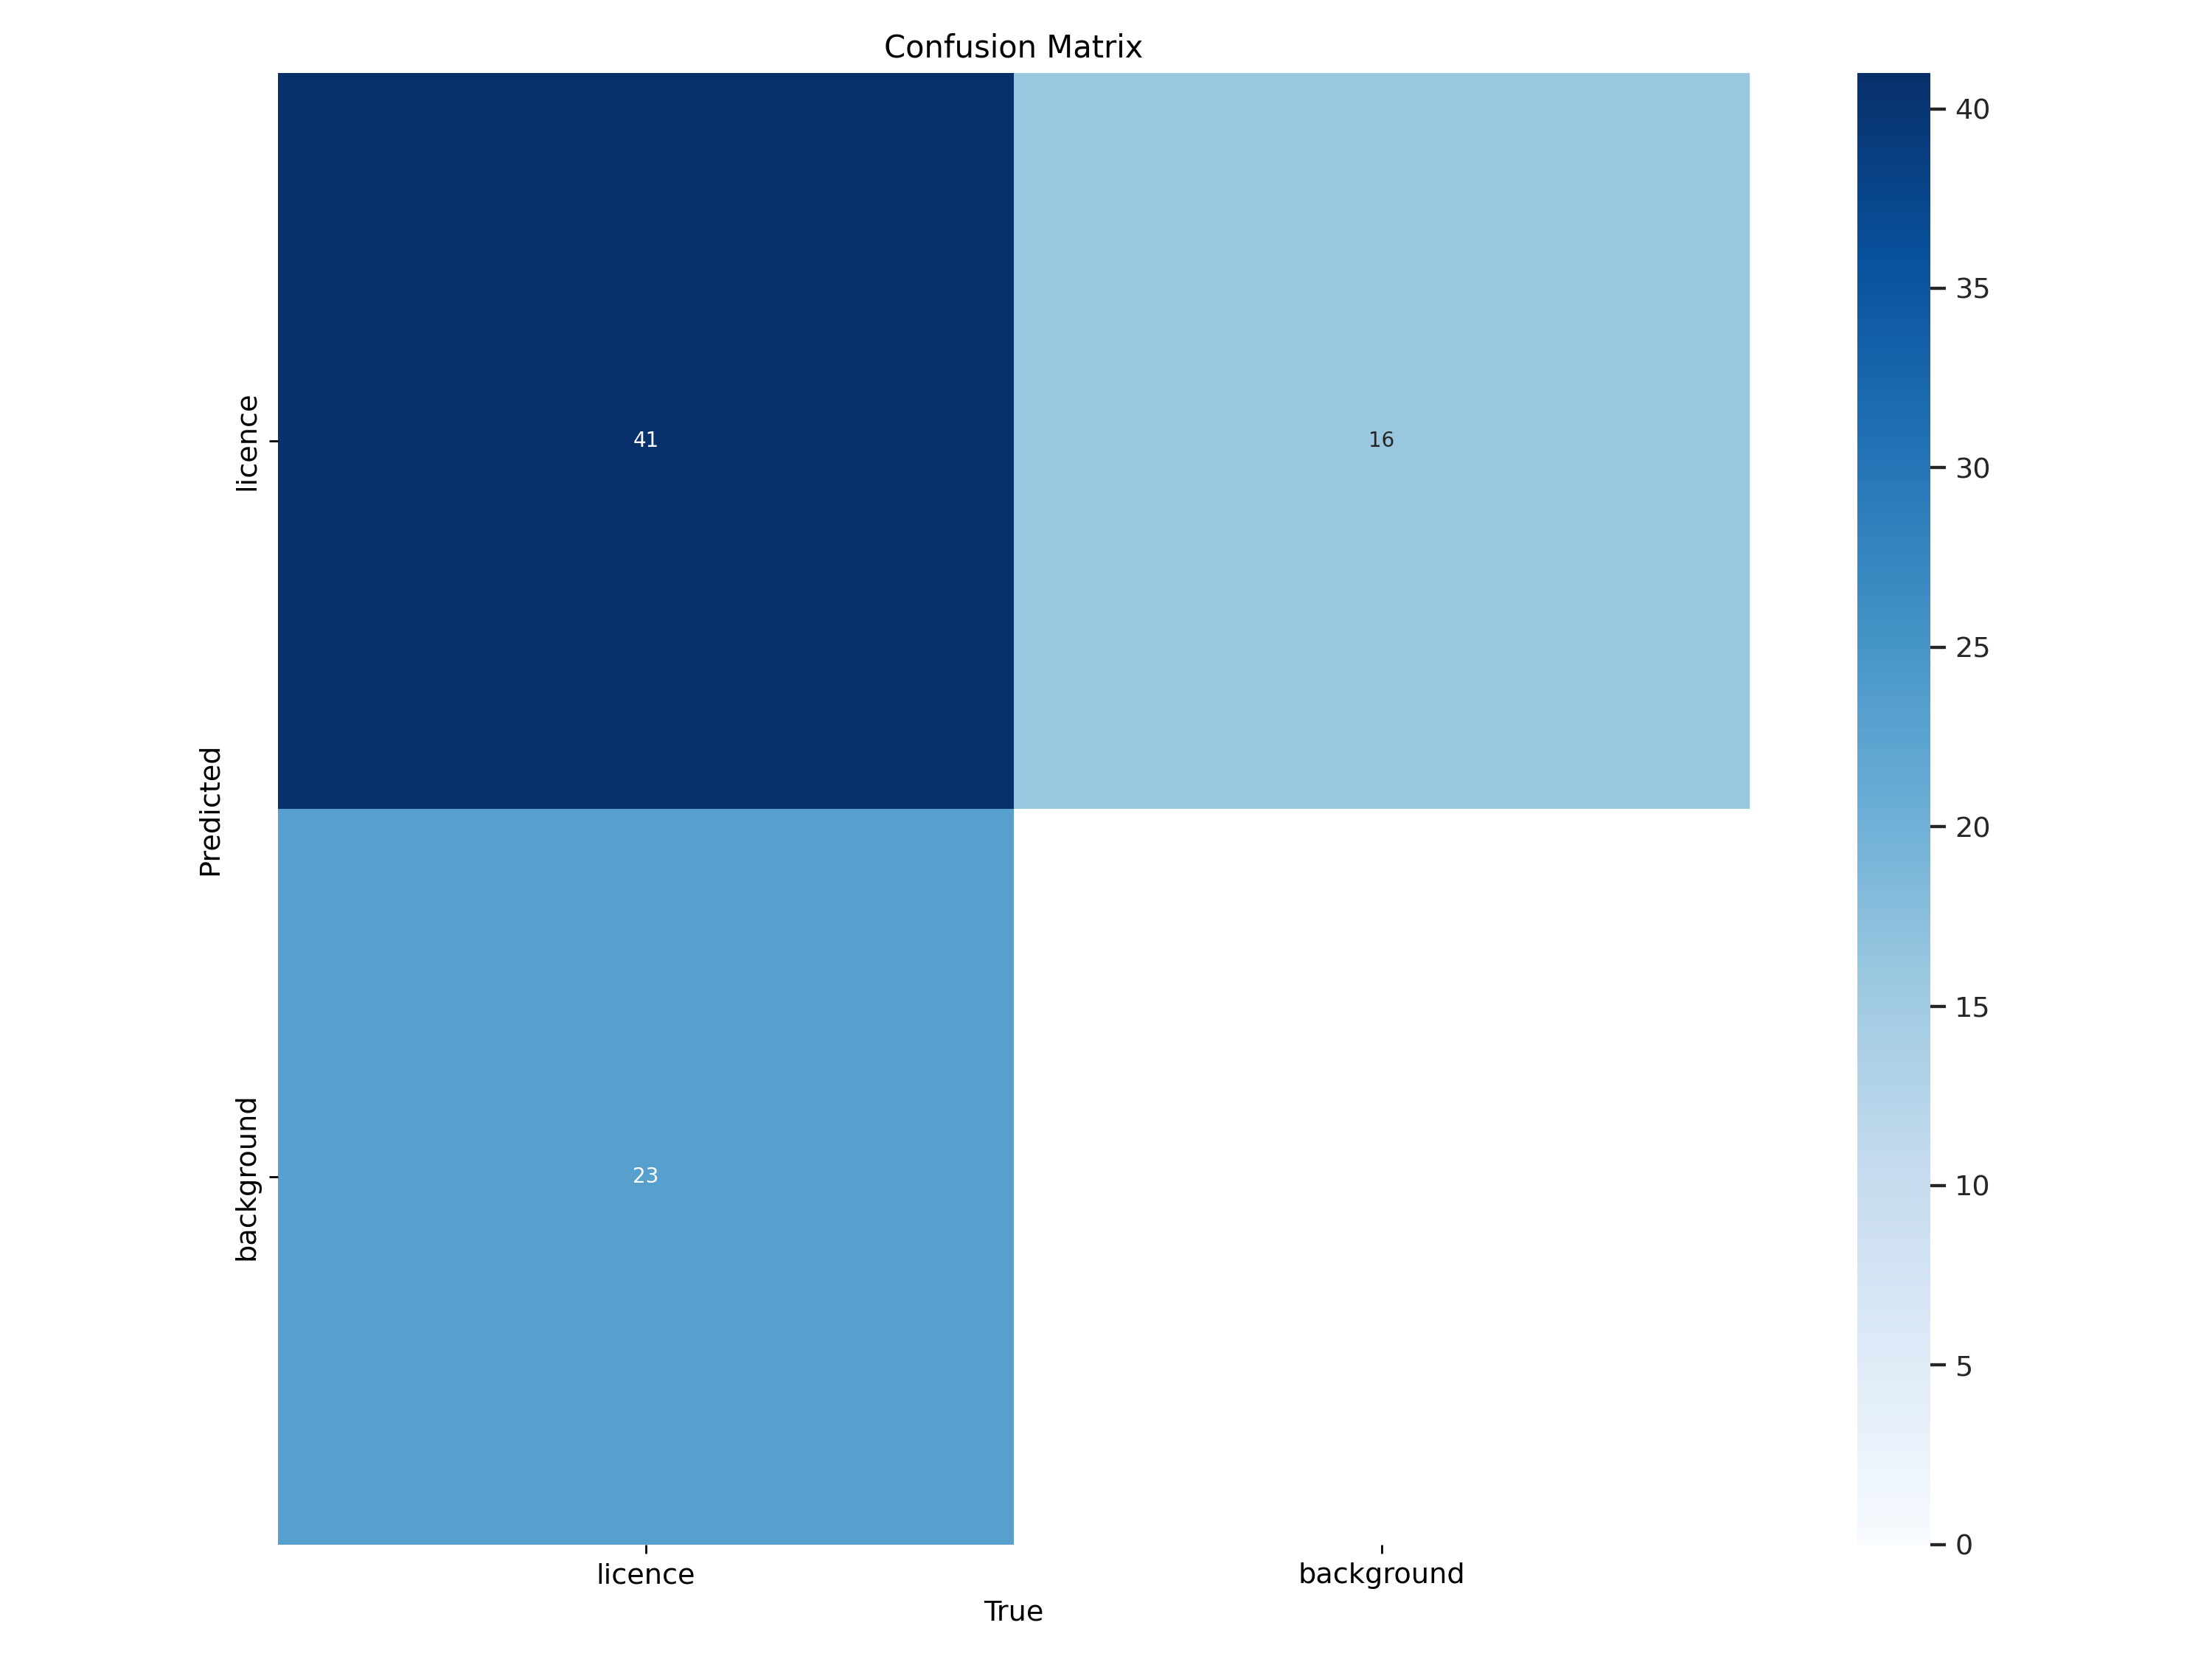

In [25]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

### Results

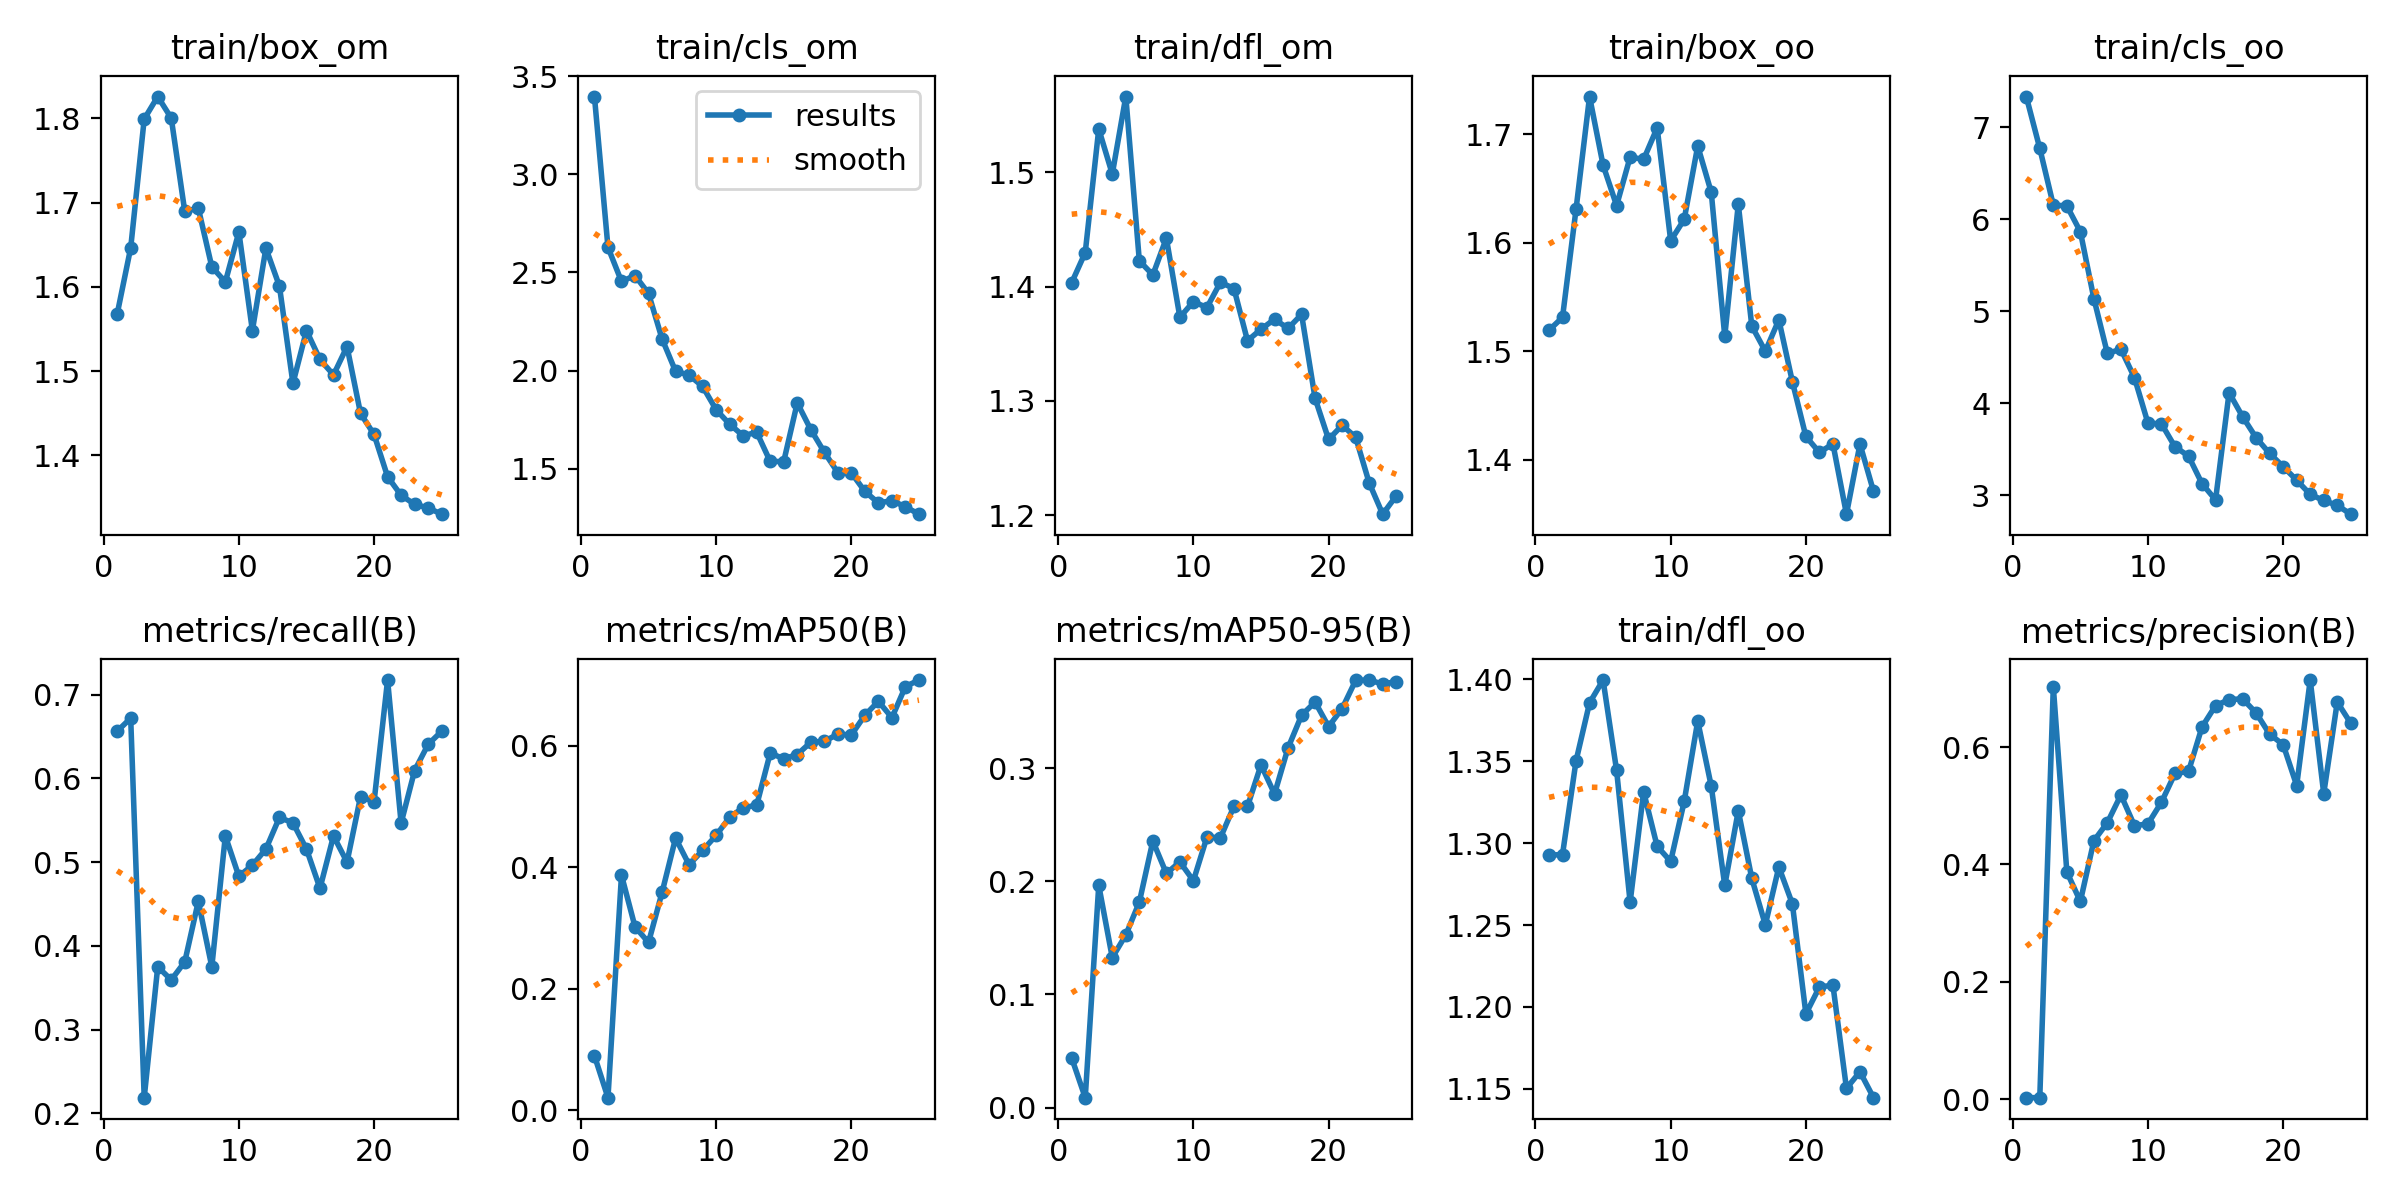

In [26]:
Image(filename='runs/detect/train/results.png', width=600)

As the epochs increases the loss decreases

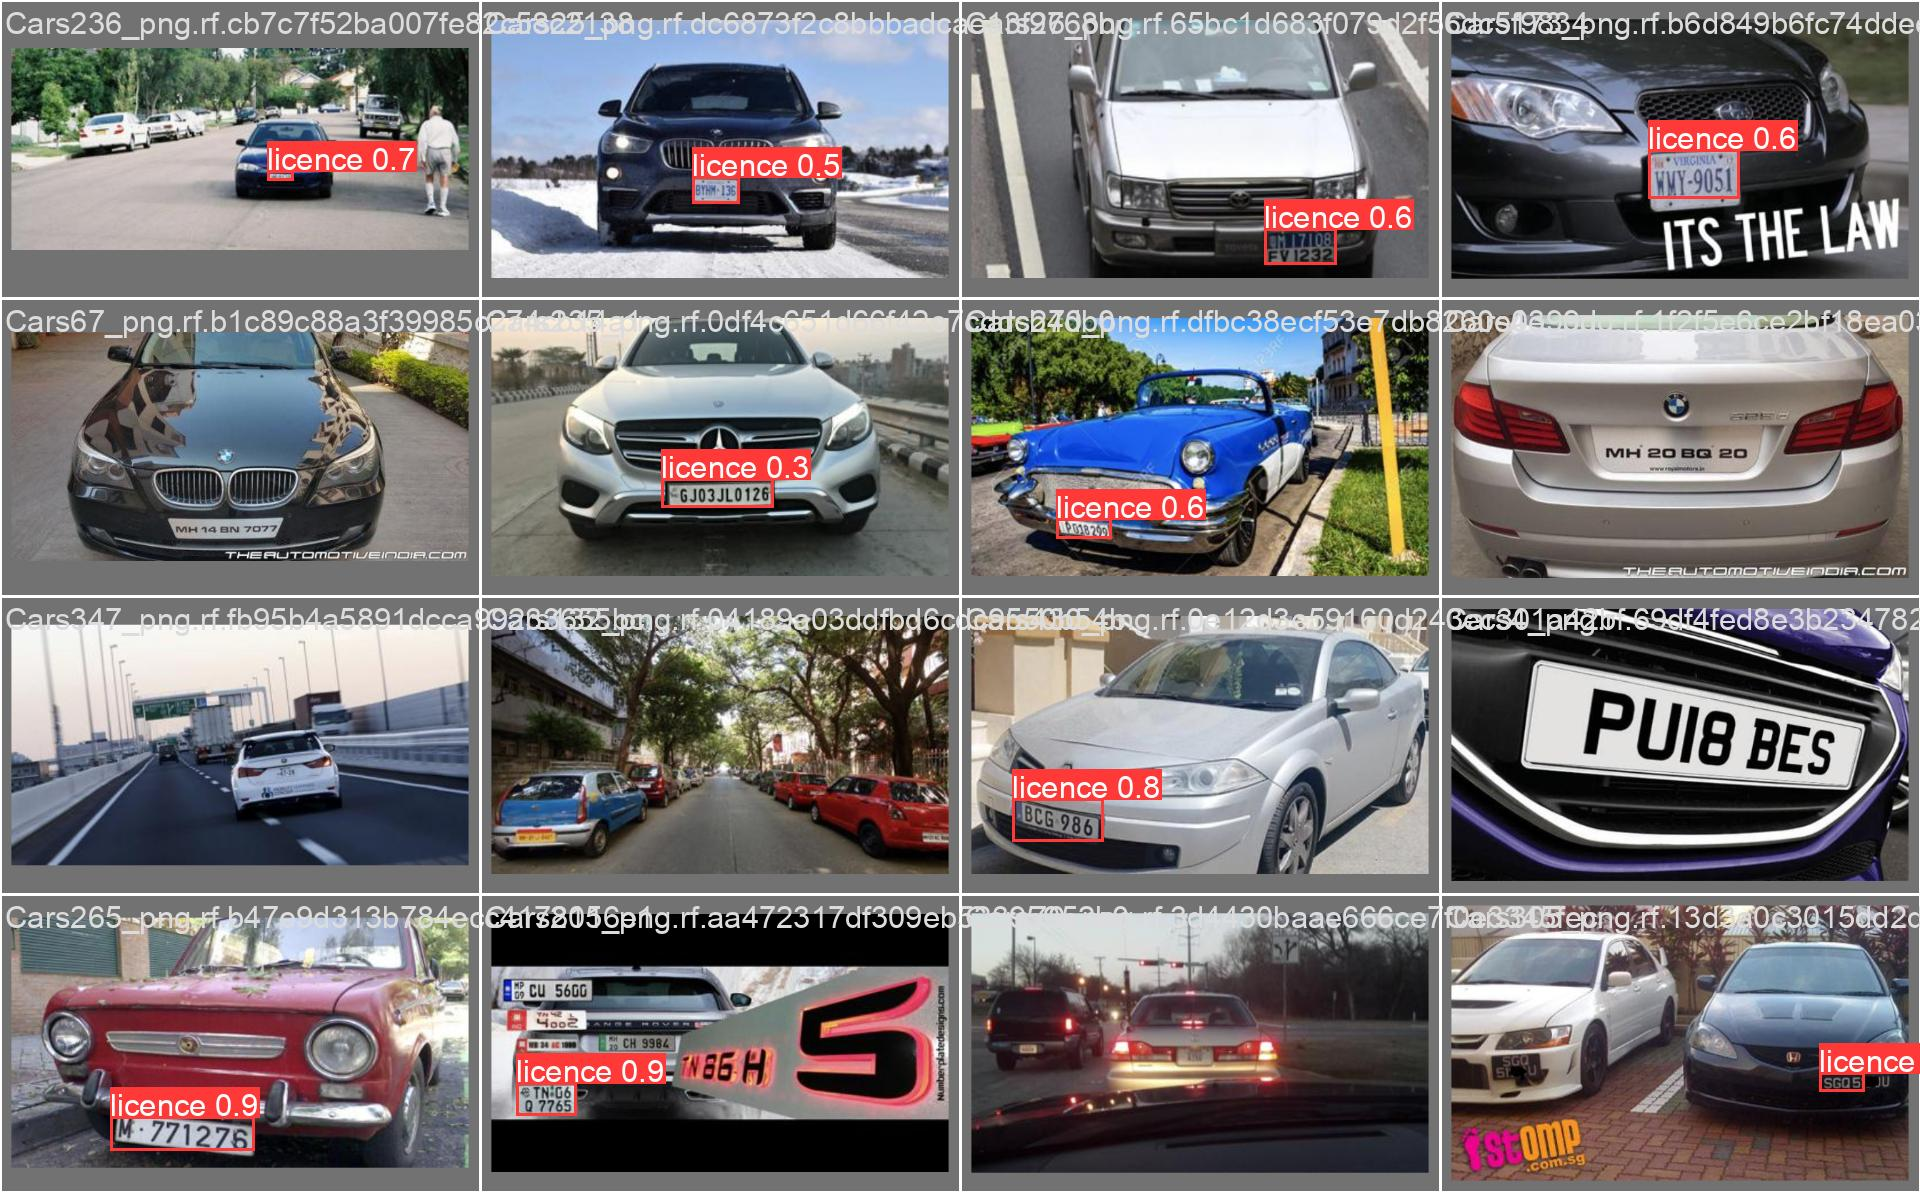

In [28]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate Custom Model

In [29]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo10/custom_dataset/dataset/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.24it/s]
                   all         60         64       0.64      0.656      0.708      0.376
Speed: 2.0ms preprocess, 33.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference with Custom Model

In [35]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=custom_dataset/dataset/test/images

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

image 1/30 /content/drive/MyDrive/Yolo10/custom_dataset/dataset/test/images/Cars100_png.rf.59ab65fb1cd60b07568305c878ab6b58.jpg: 448x640 2 licences, 69.2ms
image 2/30 /content/drive/MyDrive/Yolo10/custom_dataset/dataset/test/images/Cars103_png.rf.c1396fe10252ededea5f35d8e83fb890.jpg: 320x640 1 licence, 105.8ms
image 3/30 /content/drive/MyDrive/Yolo10/custom_dataset/dataset/test/images/Cars112_png.rf.6b7577d9914980079f0761451ffe5b40.jpg: 640x384 2 licences, 68.7ms
image 4/30 /content/drive/MyDrive/Yolo10/custom_dataset/dataset/test/images/Cars175_png.rf.72f493b8203402b36fd1b4f352f4aad9.jpg: 480x640 (no detections), 73.4ms
image 5/30 /content/drive/MyDrive/Yolo10/custom_dataset/dataset/test/images/Cars176_png.rf.695b57c7eed67dd6807e5c1f957e38b4.jpg: 416x640 (no detections), 67.5ms
image 6/30 /content/drive/MyDrive/Yolo10

For results look at predict file in runs/detect folder